# Visualización de datos

El objetivo de esta parte del proyecto corresponde a la construcción de gráficos que permitan una mejor comprensión de los datos, sus tendencias, relaciones, y todo aquello que permita esclarecer cuales establecimientos y productos tienen un rol importante en aumentar las ventas. 

# Cargando el dataset

Para este caso se continuará trabajando con el dataset sin valores 0 en la visualización creado y limpiado anteriormente.

In [ ]:
# Se importan las librerías a utilizar
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# !pip uninstall -y matplotlib
# !pip install matplotlib

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Proyecto1/df_sin_v0.csv')
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDO10,13.65,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
4,FDP10,19.00,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
5,FDH17,16.20,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Small,Tier 2,Supermarket Type1,1076.5986
6,FDU28,19.20,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Small,Tier 2,Supermarket Type1,4710.5350
7,FDA03,18.50,Regular,0.045464,Dairy,144.1102,OUT046,1997,Small,Tier 1,Supermarket Type1,2187.1530
8,FDX32,15.10,Regular,0.100014,Fruits and Vegetables,145.4786,OUT049,1999,Medium,Tier 1,Supermarket Type1,1589.2646
9,FDS46,17.60,Regular,0.047257,Snack Foods,119.6782,OUT046,1997,Small,Tier 1,Supermarket Type1,2145.2076


In [ ]:
# Si revisamos los datos nuevamente con info(), vemos que ya no hay datos nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7993 entries, 0 to 7992
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            7993 non-null   object 
 1   Item_Weight                7993 non-null   float64
 2   Item_Fat_Content           7993 non-null   object 
 3   Item_Visibility            7993 non-null   float64
 4   Item_Type                  7993 non-null   object 
 5   Item_MRP                   7993 non-null   float64
 6   Outlet_Identifier          7993 non-null   object 
 7   Outlet_Establishment_Year  7993 non-null   int64  
 8   Outlet_Size                7993 non-null   object 
 9   Outlet_Location_Type       7993 non-null   object 
 10  Outlet_Type                7993 non-null   object 
 11  Item_Outlet_Sales          7993 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 749.5+ KB


In [ ]:
# Ni datos con valores 0 al chequear con describe()
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7993.000000,7993.000000,7993.000000,7993.000000,7993.000000
mean,12.903785,0.070463,141.200392,1997.832604,2178.467363
std,4.646397,0.050295,62.210552,8.361813,1704.238870
min,4.555000,0.003575,31.290000,1985.000000,33.290000
25%,8.850000,0.031403,94.143600,1987.000000,829.586800
50%,12.650000,0.057772,143.215400,1999.000000,1794.331000
75%,17.000000,0.098103,185.760800,2004.000000,3095.970000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# Explorando cada outlet

Se revisa de manera visual la clasificación de cada outlet

# Outlets y su año de fundación

Una visualización que grafique el año de inauguración de cada outlet permite comprobar que establecimientos se establecieron primero y cuales son más recientes.


In [ ]:
año = df.groupby(['Outlet_Identifier'])['Outlet_Establishment_Year'].unique()

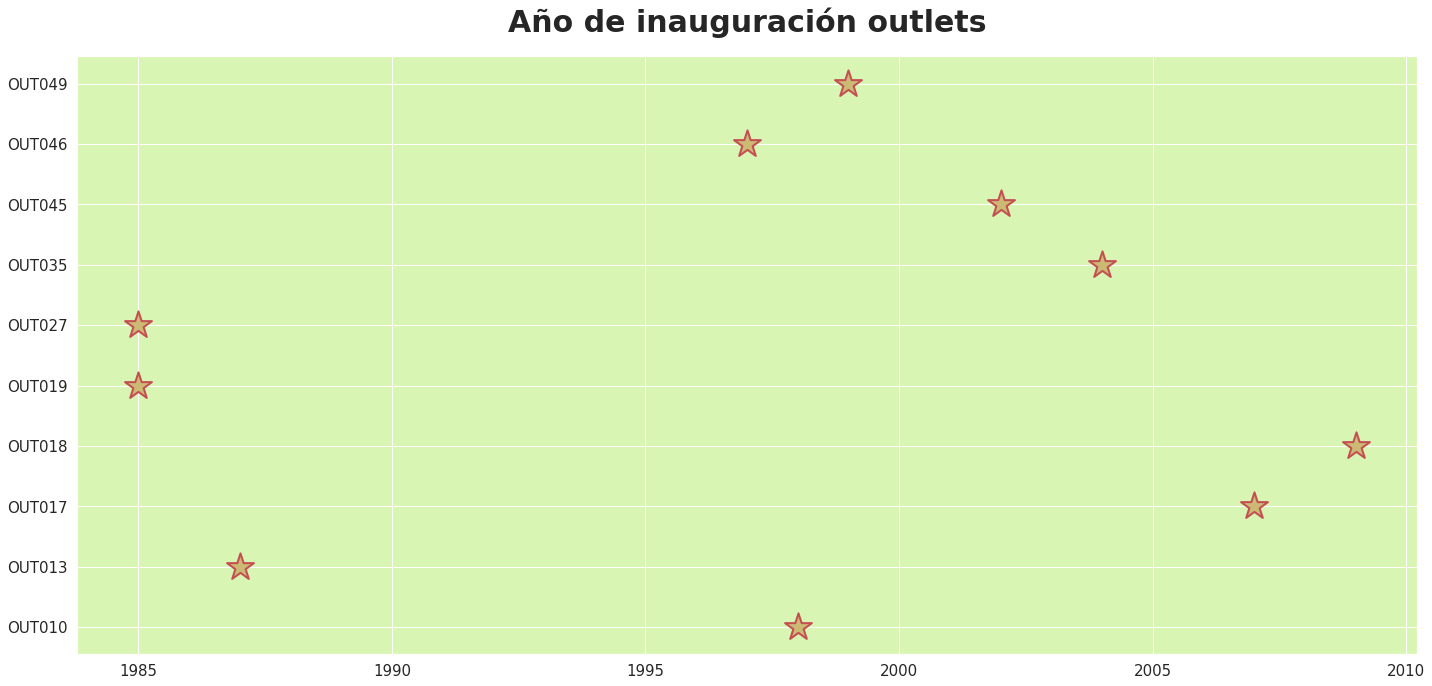

In [ ]:
ax = plt.axes()
  
# Setting the background color of the plot 
# using set_facecolor() method
ax.set_facecolor('#D9F5B3') 
  
plt.rcParams["figure.figsize"] = (12,10)
plt.scatter(año.values, año.index, marker='*', s=800, c='y', linewidths=2, edgecolors='r')
plt.title("Año de inauguración outlets",fontsize=30, fontweight='bold', pad=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()

# Tipos de Outlets

Sabemos que cada tiene distintas categorías ya sea por tipo, tamaño y ubicación, conocer el detalle de cada uno puede proporcionar más información relacionada a la predicción en las ventas de cada local.

No solo con gráficos se puede demostrar información, en este caso utilizando un groupby que agrupe cada outlet según sus características.

Vemos en la siguiente tabla (que en realidad es un dataframe) todos los outlets y sus tipo.

In [ ]:
outs = df.groupby(['Outlet_Identifier', 'Outlet_Type', 'Outlet_Location_Type', 'Outlet_Size'])[['Outlet_Identifier']].nunique()
outs

,,,,Outlet_Identifier
Outlet_Identifier,Outlet_Type,Outlet_Location_Type,Outlet_Size,
OUT010,Grocery Store,Tier 3,Small,1
OUT013,Supermarket Type1,Tier 3,High,1
OUT017,Supermarket Type1,Tier 2,Small,1
OUT018,Supermarket Type2,Tier 3,Medium,1
OUT019,Grocery Store,Tier 1,Small,1
OUT027,Supermarket Type3,Tier 3,Medium,1
OUT035,Supermarket Type1,Tier 2,Small,1
OUT045,Supermarket Type1,Tier 2,Small,1
OUT046,Supermarket Type1,Tier 1,Small,1


Text(0.5, 1.0, 'Tamaño')

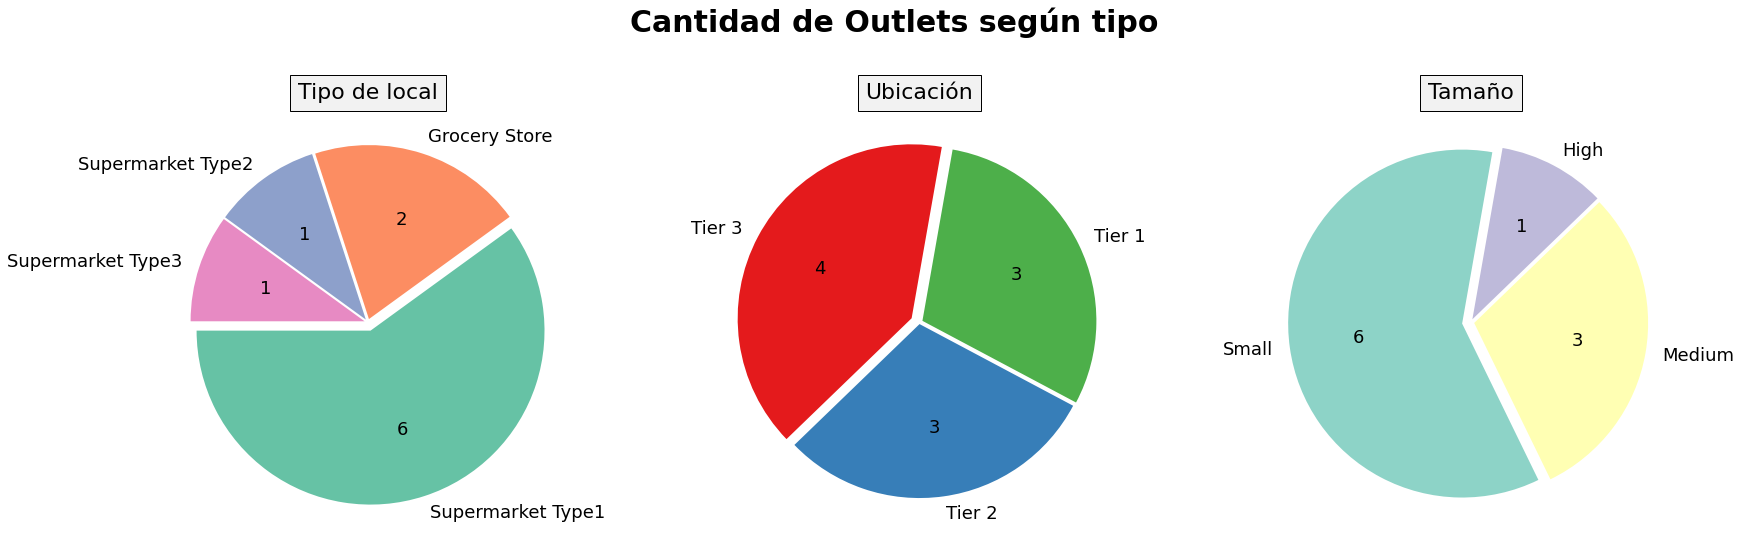

In [ ]:
outs_loc = outs.index.get_level_values('Outlet_Location_Type').value_counts()
outs_type = outs.index.get_level_values('Outlet_Type').value_counts()
outs_size = outs.index.get_level_values('Outlet_Size').value_counts()


colors1 = sns.color_palette('Set1')[0:len(outs_loc)]
colors2 = sns.color_palette('Set2')[0:len(outs_type)]
colors3 = sns.color_palette('Set3')[0:len(outs_size)]

fig1 = plt.figure(figsize=(28, 8))
fig1.suptitle("Cantidad de Outlets según tipo",fontsize=30, fontweight='bold', y=1.05)

# Se añade un subplot de una fila dos columnas, este subplot es el primero de la fila
ax1 = fig1.add_subplot(1,3,1) #1ra fila, 1ra columna, gráfico 1.
ax1.pie(outs_type.values, labels=outs_type.index ,autopct=lambda p: '{:.0f}'.format(p * outs_type.values.sum() / 100), explode=[0.05,0.02,0.02,0.02], colors=colors2, startangle = 180,textprops={'fontsize': 18})
plt.title("Tipo de local", size=22, bbox={'facecolor':'0.95', 'pad':8})

ax2 = fig1.add_subplot(1,3,2) #1ra fila, 1ra columna, gráfico 1.
ax2.pie(outs_loc.values, labels=outs_loc.index ,autopct=lambda p: '{:.0f}'.format(p * outs_loc.values.sum() / 100), explode=[0.05,0.01,0.02],startangle = 80, colors=colors1,textprops={'fontsize': 18})
plt.title("Ubicación", size=22, bbox={'facecolor':'0.95', 'pad':8})

ax3 = fig1.add_subplot(1,3,3) #1ra fila, 1ra columna, gráfico 1.
ax3.pie(outs_size.values, labels=outs_size.index,autopct=lambda p: '{:.0f}'.format(p * outs_size.values.sum() / 100),explode=[0.05,0.02,0.02],startangle = 80, colors=colors3,textprops={'fontsize': 18})
plt.title("Tamaño", size=22, bbox={'facecolor':'0.95', 'pad':8})


In [ ]:
sales = df.groupby(['Outlet_Identifier'])['Item_Outlet_Sales'].sum().sort_values()


In [ ]:
sales.values

array([ 170521.367 ,  177057.5256, 1720256.0894, 1888581.648 ,
       1989434.3688, 2002285.6404, 2037794.7518, 2063804.2288,
       2140235.4056, 3222518.606 ])

(array([      0.,  500000., 1000000., 1500000., 2000000., 2500000.,
        3000000., 3500000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

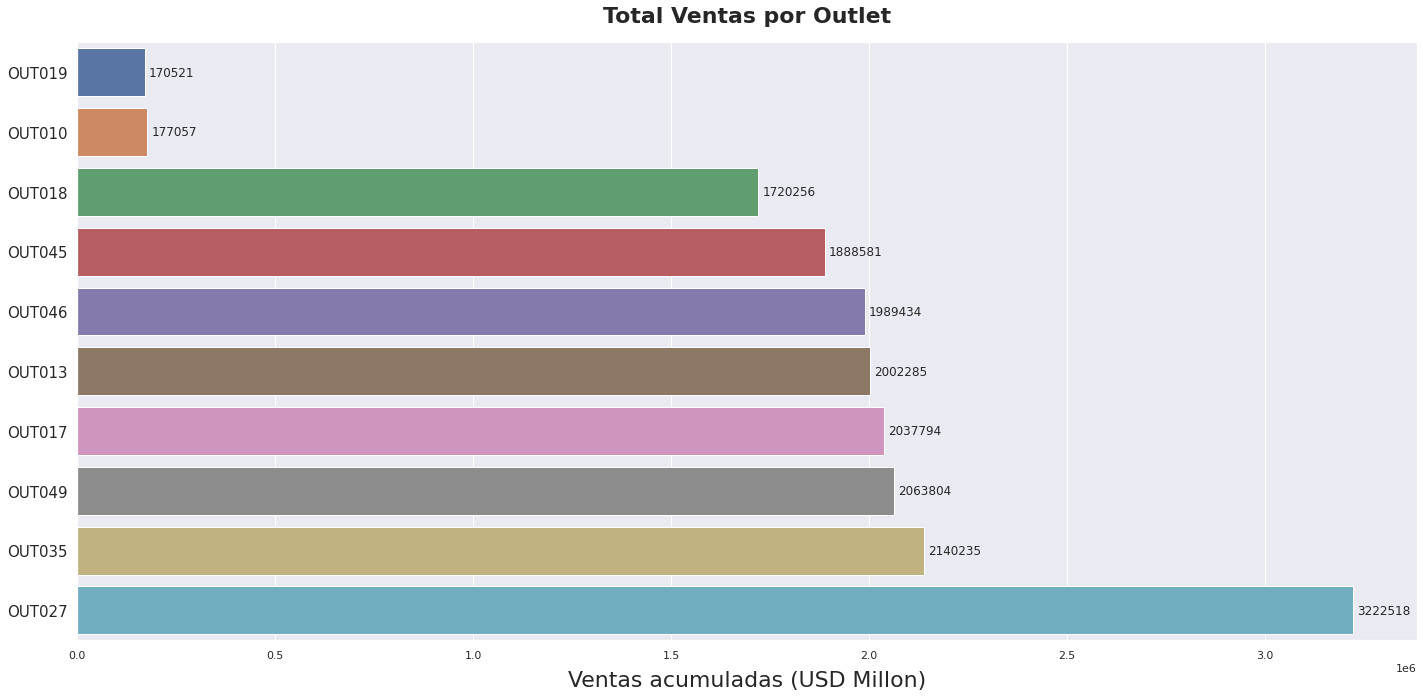

In [ ]:
# Desde seaborn se establecen parámetros tales como el estilo del gráfico y las dimensiones del mismo con .set()
sns.set(style='darkgrid', rc = {'figure.figsize':(24,11)})

# Se define un gráfico de barras con los datos de ks10, para el eje horizontal, se encuentran sus valores, o la cantidad de muertes 
# y para el eje vertical el índice de ks10, o los nombres de cada personaje de la lista
ax = sns.barplot(y=sales.index, x=sales.values)

# Para visualizar los elementos del gráfico con mejor detalle, se incorporan los valores del total de asesinatos de cada personaje
# Para esto, se utiliza bar_label con containers como argumento, que permite además personalizar parámetros del texto e cuestión
ax.bar_label(ax.containers[0],fmt = '%d', fontsize=12, padding=4)
# Se definen el título y el label para el eje x
ax.set_title("Total Ventas por Outlet", {'fontsize': 22, 'fontweight':"bold"}, pad=20)
ax.set_xlabel("Ventas acumuladas (USD Millon)", fontsize= 22, labelpad=10)
ax.set_ylabel("")
plt.yticks(fontsize=15)
plt.xticks(fontsize=11)

In [ ]:
# !pip uninstall -y matplotlib
# !pip install matplotlib

In [ ]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
4,FDP10,19.000,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
...,...,...,...,...,...,...,...,...,...,...,...,...
7988,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
7989,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850
7990,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
7991,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [ ]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1145
Snack Foods              1131
Household                 859
Frozen Foods              804
Dairy                     643
Canned                    616
Baking Goods              602
Health and Hygiene        487
Soft Drinks               411
Meat                      405
Breads                    234
Hard Drinks               197
Others                    159
Starchy Foods             133
Breakfast                 107
Seafood                    60
Name: Item_Type, dtype: int64

In [ ]:
# sales = df.groupby(['Outlet_Identifier'])['Item_Outlet_Sales'].sum().sort_values()

items = df.groupby(['Item_Type'])['Item_Outlet_Sales'].sum().sort_values()
items

Item_Type
Seafood                  1.382201e+05
Breakfast                2.268148e+05
Starchy Foods            3.046235e+05
Others                   3.048652e+05
Hard Drinks              4.216318e+05
Breads                   5.088317e+05
Soft Drinks              8.221964e+05
Meat                     8.770104e+05
Health and Hygiene       9.753384e+05
Baking Goods             1.193480e+06
Canned                   1.369648e+06
Dairy                    1.434778e+06
Frozen Foods             1.714368e+06
Household                1.950128e+06
Snack Foods              2.574106e+06
Fruits and Vegetables    2.596449e+06
Name: Item_Outlet_Sales, dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Seafood'),
  Text(1, 0, 'Breakfast'),
  Text(2, 0, 'Starchy Foods'),
  Text(3, 0, 'Others'),
  Text(4, 0, 'Hard Drinks'),
  Text(5, 0, 'Breads'),
  Text(6, 0, 'Soft Drinks'),
  Text(7, 0, 'Meat'),
  Text(8, 0, 'Health and Hygiene'),
  Text(9, 0, 'Baking Goods'),
  Text(10, 0, 'Canned'),
  Text(11, 0, 'Dairy'),
  Text(12, 0, 'Frozen Foods'),
  Text(13, 0, 'Household'),
  Text(14, 0, 'Snack Foods'),
  Text(15, 0, 'Fruits and Vegetables')])

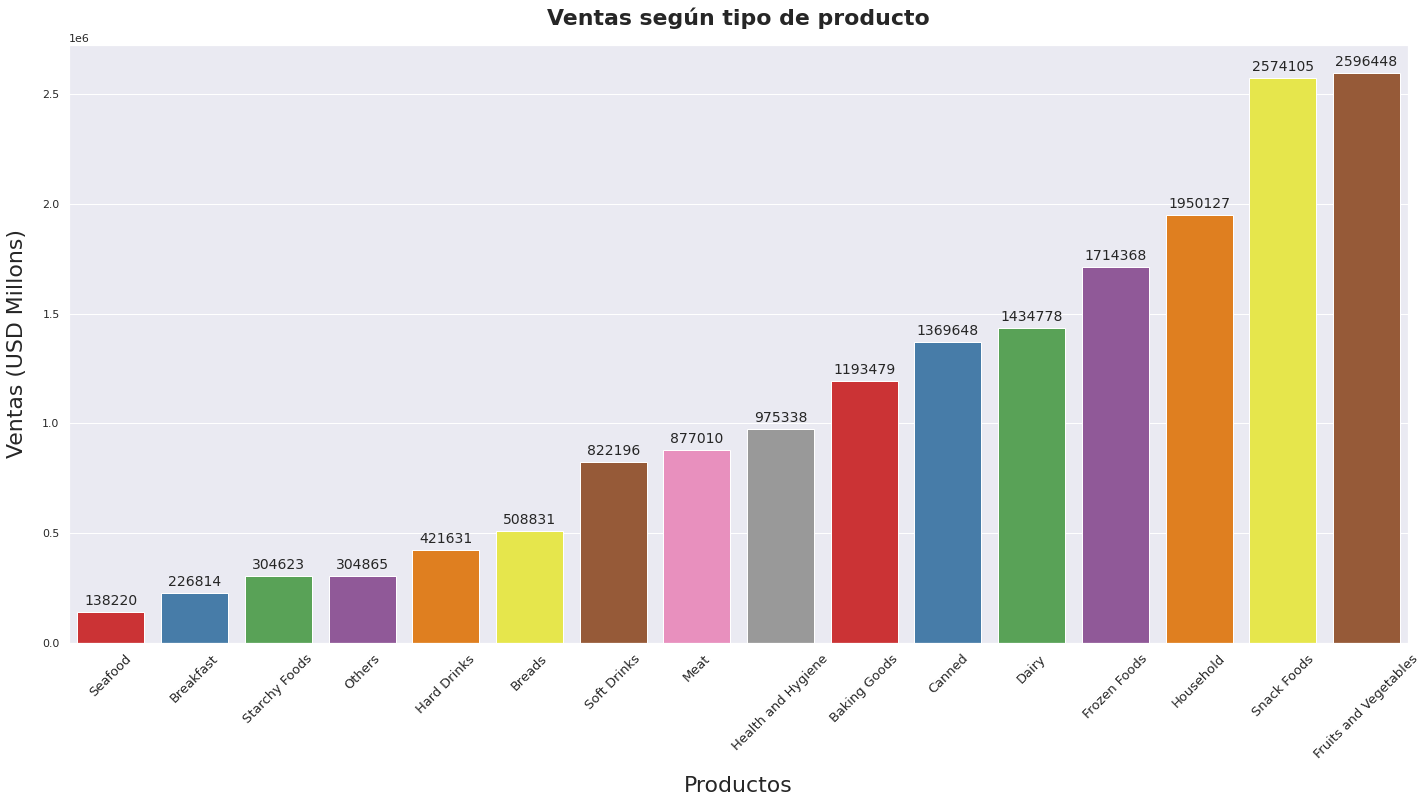

In [ ]:
ax = sns.barplot(x = items.index, y = items.values ,palette="Set1")
# Al igual que en el caso anterior, resulta mucho más eficiente acompañar con los valores acumulados por cada temporada
ax.bar_label(ax.containers[0], fontsize=14, padding=4,fmt = '%d')

# Se define el titulo y los nombres de cada eje con sus respectivos parámetros
ax.set_title("Ventas según tipo de producto", {'fontsize': 22, 'fontweight':"bold"}, pad=20)
ax.set_xlabel("Productos", fontsize= 22, labelpad=15)
ax.set_ylabel("Ventas (USD Millons)", fontsize= 22, labelpad=15)
plt.xticks(rotation=45, fontsize=13)

In [ ]:
asd =  df.groupby(['Outlet_Identifier'])['Item_Type'].value_counts()
asd.index.get_level_values('Item_Type')
asd
# for i in asd.index:
#   print(i)

Outlet_Identifier  Item_Type            
OUT010             Fruits and Vegetables    70
                   Snack Foods              67
                   Household                65
                   Frozen Foods             51
                   Dairy                    43
                                            ..
OUT049             Breads                   21
                   Others                   16
                   Starchy Foods            15
                   Breakfast                13
                   Seafood                   7
Name: Item_Type, Length: 160, dtype: int64

In [ ]:
df1

,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
OUT010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OUT013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OUT017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OUT018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OUT019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OUT027,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OUT035,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OUT045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OUT046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OUT049,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df1 = pd.DataFrame(columns=df['Item_Type'].sort_values().unique(), index=df['Outlet_Identifier'].sort_values().unique())
df1

for ind in df1.index:
  ls = df[df['Outlet_Identifier']==ind]['Item_Type'].value_counts()
  for i in range(len(ls)):
    for j in range(len(df1.columns)):
      if ls.index[i] == df1.columns[j]:
        df1.loc[ind,df1.columns[j]] =ls.values[i]

In [ ]:
df1

,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
OUT010,42,16,9,34,43,51,70,15,34,65,32,9,4,67,26,9
OUT013,66,24,13,59,76,88,132,23,56,95,39,16,5,118,45,18
OUT017,71,21,12,65,68,97,119,21,58,86,40,16,5,122,51,17
OUT018,60,26,10,73,68,86,124,21,54,88,45,18,7,123,44,16
OUT019,38,16,10,34,46,44,69,8,28,52,30,17,5,72,24,4
OUT027,65,29,11,69,62,82,128,20,53,97,54,15,6,128,41,12
OUT035,65,29,10,76,68,84,121,21,49,96,42,14,8,129,48,16
OUT045,65,29,10,72,65,78,136,24,53,93,35,19,7,127,44,14
OUT046,69,23,9,70,75,103,119,17,54,96,42,19,6,111,44,12
OUT049,61,21,13,64,72,91,127,27,48,91,46,16,7,134,44,15


In [ ]:
df[df['Outlet_Identifier']=='OUT018']['Item_Type'].value_counts()

Fruits and Vegetables    124
Snack Foods              123
Household                 88
Frozen Foods              86
Canned                    73
Dairy                     68
Baking Goods              60
Health and Hygiene        54
Meat                      45
Soft Drinks               44
Breads                    26
Hard Drinks               21
Others                    18
Starchy Foods             16
Breakfast                 10
Seafood                    7
Name: Item_Type, dtype: int64

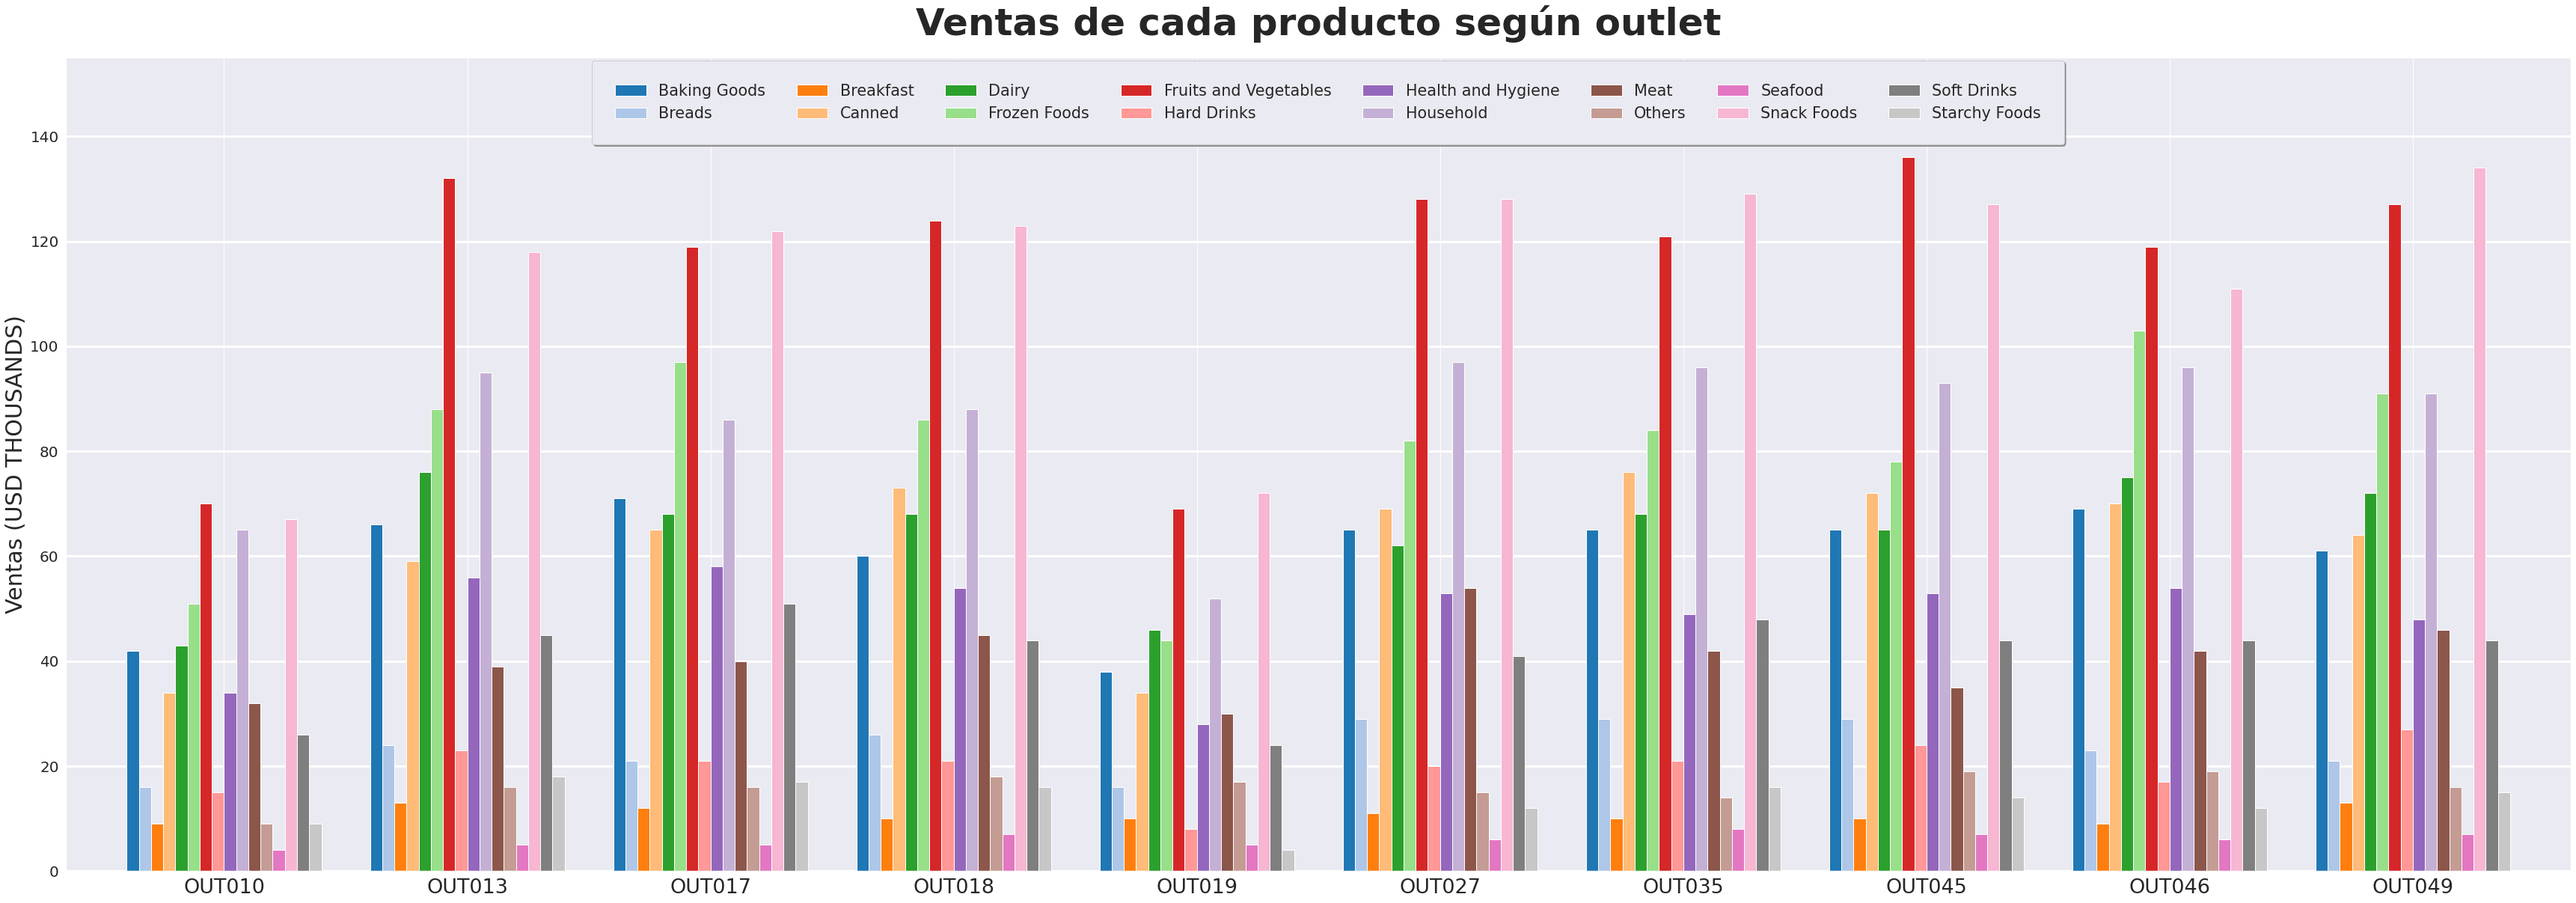

In [ ]:
color = sns.color_palette('tab20')[0:17]
sns.set(rc = {'figure.figsize':(60,20)}) 
df1.plot(kind="bar", align='center', width=.8, color=color)
plt.title("Ventas de cada producto según outlet", fontweight='bold', fontsize=50, pad=30)
plt.ylabel("Ventas (USD THOUSANDS)", size=30)
plt.grid(axis='y', linewidth=3)
plt.ylim(0,155)
plt.xticks(rotation=0, size=27)
plt.yticks(rotation=0, size=20)
plt.legend(ncol=8, fancybox=True, framealpha=1, shadow=True, borderpad=1.5, fontsize='xx-large', loc=(0.21, 0.893), handletextpad=0.8)
plt.rcParams["legend.markerscale"] = 2.0